**Data Set Characteristics:**

    :Number of Instances: 20640
    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

    This dataset was obtained from the StatLib repository.
    https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

    The target variable is the median house value for California districts,
    expressed in hundreds of thousands of dollars ($100,000).

    This dataset was derived from the 1990 U.S. census, using one row per census
    block group. A block group is the smallest geographical unit for which the U.S.
    Census Bureau publishes sample data (a block group typically has a population
    of 600 to 3,000 people).

    A household is a group of people residing within a home. Since the average
    number of rooms and bedrooms in this dataset are provided per household, these
    columns may take surprisingly large values for block groups with few households
    and many empty houses, such as vacation resorts.

    It can be downloaded/loaded using the
    :func:`~sklearn.datasets.fetch_california_housing` function.

.. rubric:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297.

In [1]:
import tensorflow as tf

#tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

C:\Users\ashish.sharma\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Using TensorFlow version 2.17.0


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:
# Load the California Housing dataset
california_housing = fetch_california_housing(as_frame=True)


EDA

In [4]:

X = california_housing.data
print("\nFeatures (X) shape:", X.shape)
print("Features (X) head:\n", X.head())


y = california_housing.target
print("\nTarget (y) shape:", y.shape)
print("Target (y) head:\n", y.head())


print("\nFeature Names:", california_housing.feature_names)


df = california_housing.frame
print("\nCombined DataFrame (df) shape:", df.shape)
print("Combined DataFrame (df) head:\n", df.head())


Features (X) shape: (20640, 8)
Features (X) head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target (y) shape: (20640,)
Target (y) head:
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Combined DataFrame (df) shape: (20640, 9)
Combined DataFrame (df) head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


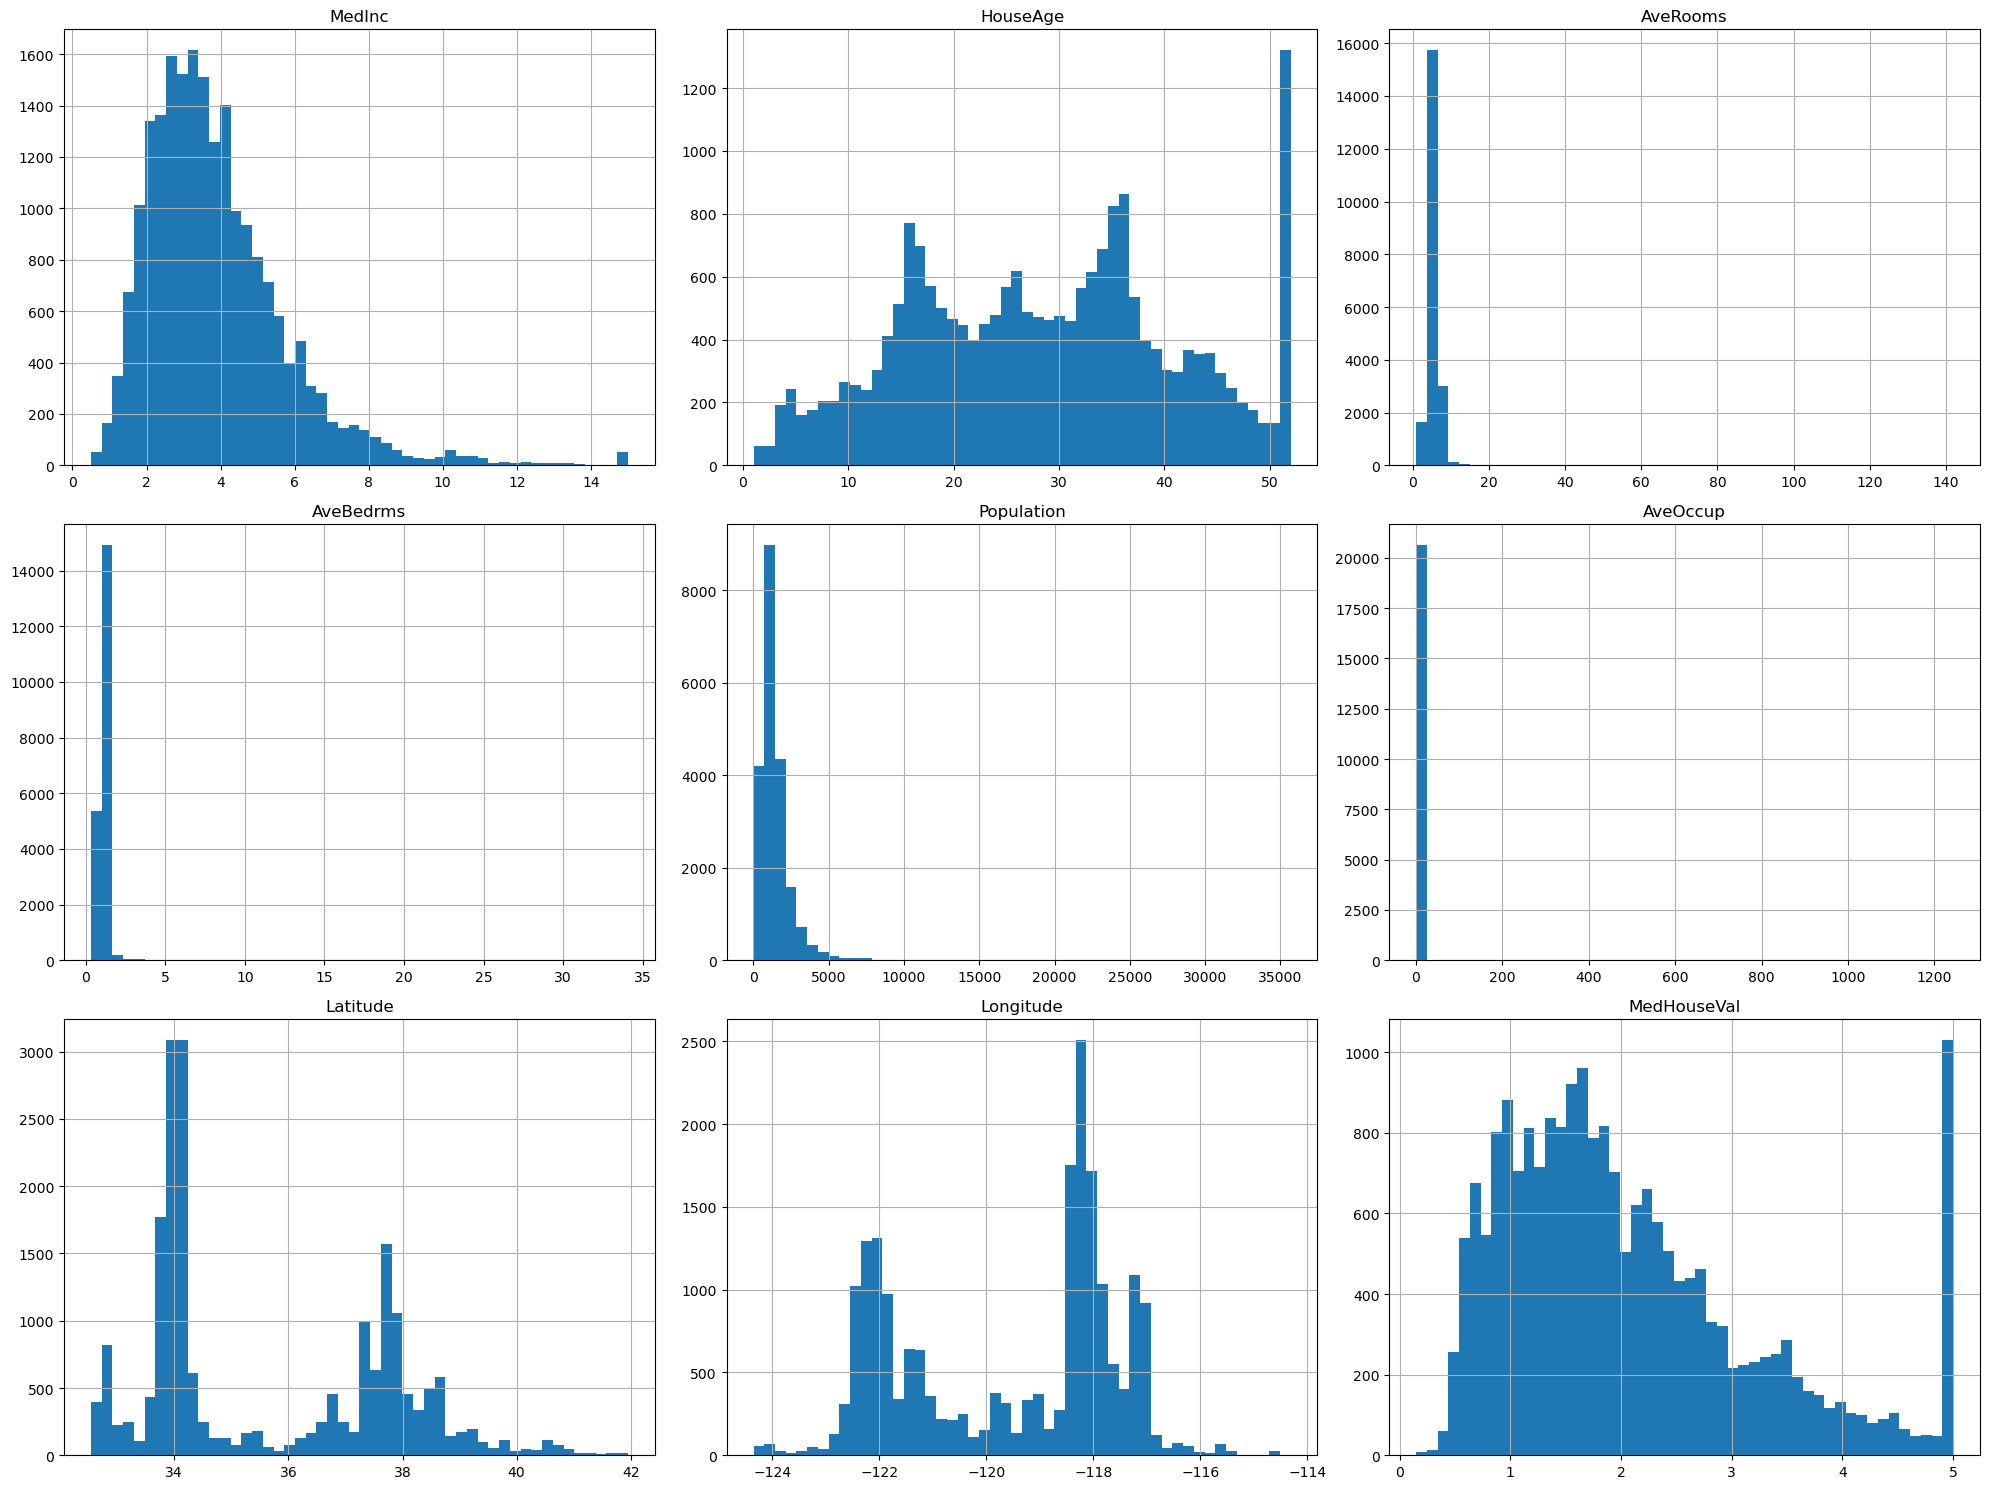

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('MedHouseVal', axis=1) # All columns except the target
y = df['MedHouseVal'] # The target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [8]:
X.shape

(20640, 8)

PHASE 1- MODEL DEFINITION

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model= Sequential([Dense(128, activation='relu', input_shape=(8,)),
                  
                  Dense(128, activation='relu'),
                  
                  Dense(1, activation='linear')])

model.summary()

C:\Users\ashish.sharma\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

PHASE 2- MODEL COMPILATION

In [10]:
model.compile(
    optimizer='Adam',
    loss='MSE',
    metrics=['MAE']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

PHASE 3- MODEL TRAINING (LEARNING)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', # What to monitor
    patience=10,        # How many epochs to wait after no improvement
    restore_best_weights=True # Restore model weights from the epoch with the best val_loss
)

In [19]:
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - MAE: 0.2497 - loss: 0.1265 - val_MAE: 0.3435 - val_loss: 0.2530
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - MAE: 0.2470 - loss: 0.1234 - val_MAE: 0.3478 - val_loss: 0.2584
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - MAE: 0.2509 - loss: 0.1240 - val_MAE: 0.3453 - val_loss: 0.2576
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - MAE: 0.2485 - loss: 0.1237 - val_MAE: 0.3402 - val_loss: 0.2564
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - MAE: 0.2511 - loss: 0.1260 - val_MAE: 0.3425 - val_loss: 0.2499
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - MAE: 0.2467 - loss: 0.1219 - val_MAE: 0.3471 - val_loss: 0.2705
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - MAE: 0.2505 - loss: 0.1312 - val_MAE: 0.3398 - val_loss: 0.2539
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - MAE: 0.2501 - loss: 0.1256 - val_MAE: 0.3386 - val_loss: 0.2545
Epoch 9/100
413/413 ━━━━━━━━━━━━

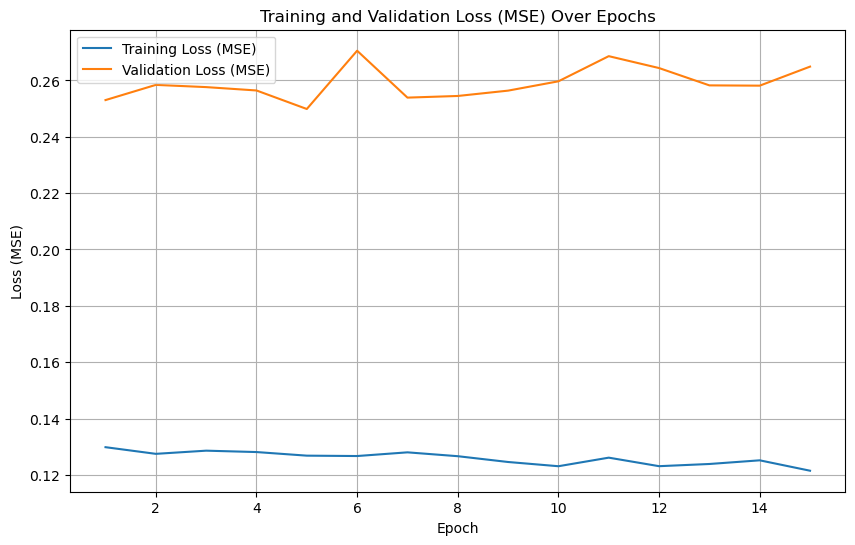

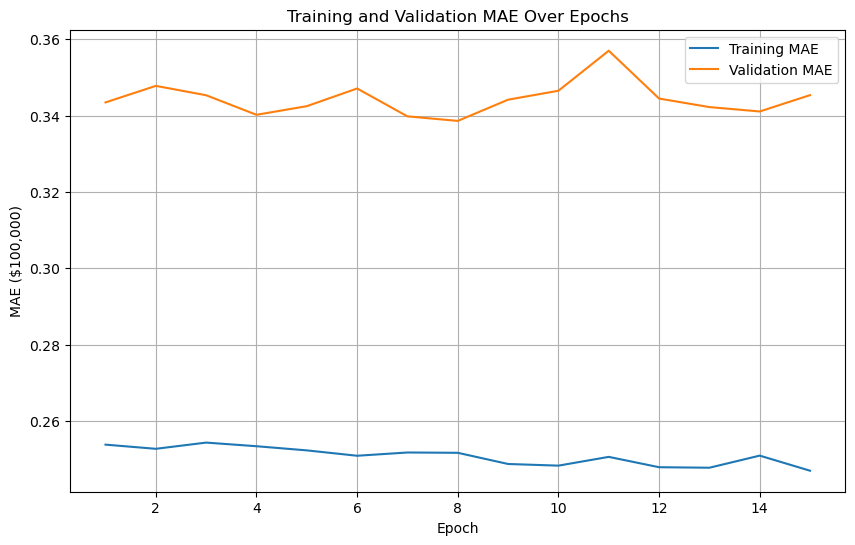

In [20]:
import matplotlib.pyplot as plt

# Get the list of epochs
epochs = range(1, len(history.history['loss']) + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.plot(epochs, history.history['loss'], label='Training Loss (MSE)')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training and Validation Loss (MSE) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True) 
plt.show()

# Plot Training and Validation MAE
plt.figure(figsize=(10, 6)) # Adjust figure size for better readability
plt.plot(epochs, history.history['MAE'], label='Training MAE')
plt.plot(epochs, history.history['val_MAE'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE ($100,000)') 
plt.legend()
plt.grid(True) # Add a grid for better readability
plt.show()

PHASE 4 - MODEL EVALUATION

In [22]:
mse_loss, mae= model.evaluate(X_test_scaled,y_test)
print(f"Test MAE: {mae:.4f}") 
print(f"Test MSE Loss: {mse_loss:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - MAE: 0.3485 - loss: 0.2718
Test MAE: 0.3537
Test MSE Loss: 0.2823


USING MODEL TO PREDICT 

In [23]:
# first 5 samples from scaled test set for demonstration
new_data_for_prediction = X_test_scaled[:5]

print("Shape of data for prediction:", new_data_for_prediction.shape)
print("First 5 actual values (y_test):")
print(y_test[:5])

# Make predictions
predictions = model.predict(new_data_for_prediction)

print("\nPredictions (MedHouseVal in $100,000s):")
print(predictions)

Shape of data for prediction: (5, 8)
First 5 actual values (y_test):
20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Predictions (MedHouseVal in $100,000s):
[[0.49974132]
 [0.5531615 ]
 [5.844246  ]
 [2.5376356 ]
 [2.8232477 ]]


In [24]:
predictions_in_dollars = predictions * 100000
print("\nPredictions (in dollars):")
print(predictions_in_dollars)


Predictions (in dollars):
[[ 49974.13158417]
 [ 55316.15018845]
 [584424.59106445]
 [253763.55648041]
 [282324.76711273]]


HYPOTHETICAL DATA

In [26]:
import numpy as np
# Example hypothetical single new house data (UNSCALED)
# MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude
single_new_house_features_unscaled = np.array([
    5.0,   # MedInc (Median income)
    30.0,  # HouseAge (Median house age)
    6.0,   # AveRooms (Average number of rooms)
    1.1,   # AveBedrms (Average number of bedrooms)
    1500.0,# Population
    3.0,   # AveOccup (Average number of household members)
    34.0,  # Latitude
    -118.0 # Longitude
])

# IMPORTANT: Reshape for a single sample (1 row, 8 columns)
single_new_house_features_unscaled = single_new_house_features_unscaled.reshape(1, -1) # Reshape to (1, 8)

print("\nShape of single new house features before scaling:", single_new_house_features_unscaled.shape)

# Scale the new data
single_new_house_features_scaled = scaler.transform(single_new_house_features_unscaled)

print("Shape of single new house features after scaling:", single_new_house_features_scaled.shape)
print("Scaled single new house features:", single_new_house_features_scaled)

# Make prediction for the single new house
prediction_single_house = model.predict(single_new_house_features_scaled)

print("\nPrediction for single new house (MedHouseVal in $100,000s):")
print(prediction_single_house[0][0]) # Access the scalar value

print("\nPrediction for single new house (in dollars):")
print(prediction_single_house[0][0] * 100000)


Shape of single new house features before scaling: (1, 8)
Shape of single new house features after scaling: (1, 8)
Scaled single new house features: [[ 0.58776622  0.11043502  0.23657034  0.00765291  0.06468388 -0.00837432
  -0.76904838  0.78893904]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Prediction for single new house (MedHouseVal in $100,000s):
2.455734

Prediction for single new house (in dollars):
245573.40145111084


C:\Users\ashish.sharma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
